In [11]:
import math
import warnings

from IPython.display import display
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.formula.api as smf
import scipy.stats as stats

#display prefs
%matplotlib inline
pd.options.display.float_format = '{:.3f}'.format
sns.set_style('whitegrid')

#error suppress
warnings.filterwarnings(action='ignore',
                       module='scipy',
                       message='^internal gelsd')

In [12]:
#acquire, load, and preview the data.
data = pd.read_csv('https://tf-curricula-prod.s3.amazonaws.com/data-science/Advertising.csv')
display(data.head())

#instantiate and fit model
regr = linear_model.LinearRegression()
Y = data['Sales'].values.reshape(-1,1)
X = data[['TV', 'Radio', 'Newspaper']]
regr.fit(X,Y)

#inspect results
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X,Y))

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.100,37.800,69.200,22.100
1,2,44.500,39.300,45.100,10.400
2,3,17.200,45.900,69.300,9.300
3,4,151.500,41.300,58.500,18.500
4,5,180.800,10.800,58.400,12.900



Coefficients: 
 [[ 0.04576465  0.18853002 -0.00103749]]

Intercept: 
 [2.93888937]

R-squared:
0.8972106381789521


## Assumption one: linear relationship

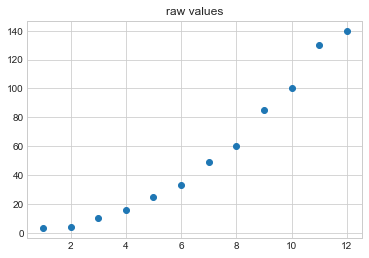

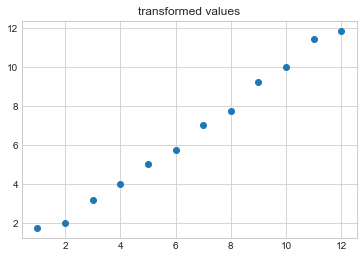

In [13]:
#sample data
outcome = [1,2,3,4,5,6,7,8,9,10,11,12]
feature = [3,4,10,16,25,33,49,60,85,100,130,140]

#plot the data as is, appears quadratic
plt.scatter(outcome, feature)
plt.title('raw values')
plt.show()

#create a feature using a non-linear transformation
sqrt_feature = [math.sqrt(x) for x in feature]

#plot again
plt.scatter(outcome, sqrt_feature)
plt.title('transformed values')
plt.show()

## Assumption two: multivariate normality

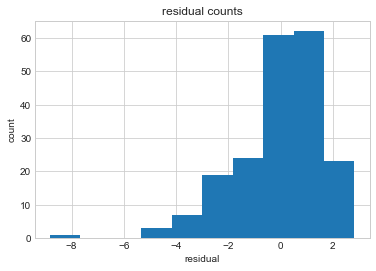

In [14]:
#extract predicted values
predicted = regr.predict(X).ravel()
actual = data['Sales']

#calculated error aka residual
residual = actual - predicted

#plot distribution, this is not normal
plt.hist(residual)
plt.title('residual counts')
plt.xlabel('residual')
plt.ylabel('count')
plt.show()

## Assumption three: homoscedasticity

Distribution of error (scedasticity) should be consistent for all predicted values (homescedastic)

Heteroscedasticity  fixes include transforming the dependent variable and adding features that target the poorly estimated areas

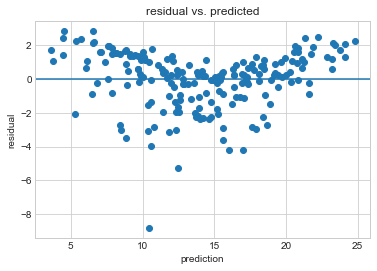

In [15]:
plt.scatter(predicted, residual)
plt.xlabel('prediction')
plt.ylabel('residual')
plt.axhline(y=0)
plt.title('residual vs. predicted')
plt.show()

## Assumption four: low multicollinearity

Correlations among features should be low (or nonexistent)

Fixes include PCA or by discarding some of the correlated features

In [16]:
correlation_matrix = X.corr()
display(correlation_matrix)

,TV,Radio,Newspaper
TV,1.000,0.055,0.057
Radio,0.055,1.000,0.354
Newspaper,0.057,0.354,1.000


## Drill: fixing assumptions

Fix multivariate non-normality and heteroscedasticity

In [17]:
print('residual median: {}'.format(residual.median()))
print('residual mean: {}'.format(residual.mean()))
print('residual std: {}'.format(residual.std()))

residual median: 0.24180176660490105
residual mean: -1.092459456231154e-15
residual std: 1.6727572743844112


In [18]:
#square root features for variable linearity
tv_sqrt = [math.sqrt(x) for x in data['TV']]
radio_sqrt = [math.sqrt(x) for x in data['Radio']]
newspaper_sqrt = [math.sqrt(x) for x in data['Newspaper']]

#put features in new X variable
X_feat = data[['TV','Radio','Newspaper']]
X_feat['TV'] = tv_sqrt
X_feat['Radio'] = radio_sqrt
X_feat['Newspaper'] = newspaper_sqrt

regr.fit(X_feat, Y)
print('\nCoefficients: \n', regr.coef_)
print('\nIntercept: \n', regr.intercept_)
print('\nR-squared:')
print(regr.score(X_feat, Y))


Coefficients: 
 [[0.96780469 1.55683139 0.04403645]]

Intercept: 
 [-4.22436341]

R-squared:
0.908373083011997


/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/in

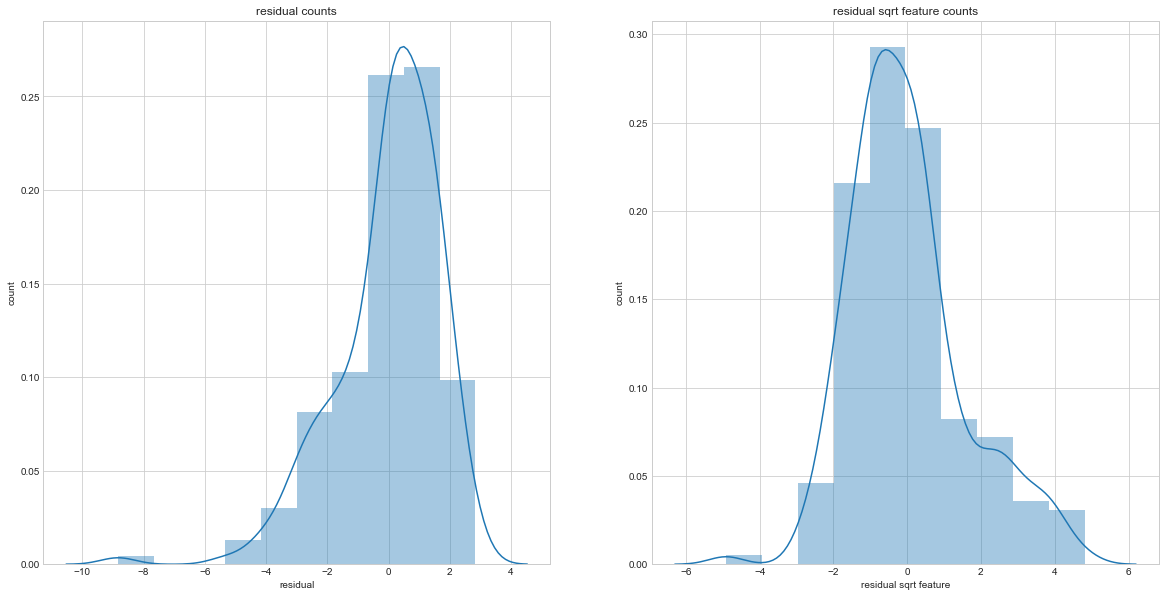

In [19]:
predicted_feat = regr.predict(X_feat).ravel()
residual_feat = actual - predicted_feat

plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns.distplot(residual, bins=10)
plt.title('residual counts')
plt.xlabel('residual')
plt.ylabel('count')

plt.subplot(1,2,2)
sns.distplot(residual_feat, bins=10)
plt.title('residual sqrt feature counts')
plt.xlabel('residual sqrt feature')
plt.ylabel('count')

plt.show()

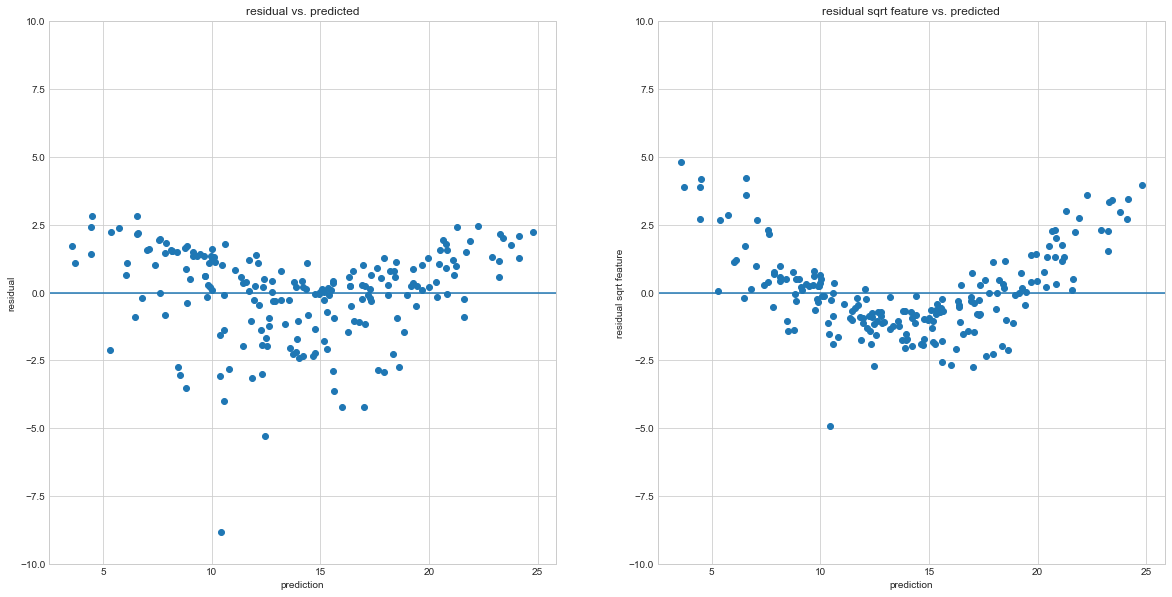

In [20]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
plt.scatter(predicted, residual)
plt.xlabel('prediction')
plt.ylabel('residual')
plt.axhline(y=0)
plt.title('residual vs. predicted')
axes = plt.gca()
axes.set_ylim([-10, 10])

plt.subplot(1,2,2)
plt.scatter(predicted, residual_feat)
plt.xlabel('prediction')
plt.ylabel('residual sqrt feature')
plt.axhline(y=0)
plt.title('residual sqrt feature vs. predicted')
axes = plt.gca()
axes.set_ylim([-10, 10])

plt.show()